<h1 align="center" style="background-color:DodgerBlue;">Desafío - Dimensionalidad y agrupación (I)</h1>

* Para realizar este desafío debes haber estudiado previamente todo el material disponibilizado correspondiente a la unidad.
* Una vez terminado el desafío, comprime la carpeta que contiene el desarrollo de los requerimientos solicitados y sube el .zip en el LMS.
* Desarrollo desafío:
  * El desafío se debe desarrollar de manera Individual.
  * Para la realización del desafío necesitarás apoyarte del archivo Apoyo Desafío - Dimensionalidad y agrupación (I).

### Contexto

Para esta actividad utilizaremos un subconjunto de 25 ítems de la International Personality
Item Pool, aplicados a 2800 individuos. El objetivo de esta información es desarrollar
perfiles de personalidad en base a una serie de oraciones asociadas a las características
Amabilidad, Escrupulosidad, Extroversión, Neuroticismo, Apertura Los individuos deben
responder qué tan adecuada es la oración respecto a su personalidad en base a 6
categorías:

* 1: No me representa para nada.
* 2: No me representa.
* 3: Algunas cosas no me representan.
* 4: Algunas cosas me representan.
* 5: Me representa.
* 6: Me representa completamente.

#### Las 25 preguntas son:

* A1 Soy indiferente a los sentimientos de otros.
* A2 Me preocupo del bienestar de otros.
* A3 Sé cómo confortar a otros.
* A4 Me agradan los niños.
* A5 Hago sentir tranquila a la gente.
* C1 Soy exacto en mi trabajo.
* C2 Sigo con mis tareas hasta que todo esté perfecto.
* C3 Hago cosas siguiendo un plan.
* C4 Hago cosas con el mínimo esfuerzo.
* C5 Pierdo mi tiempo.
* E1 No hablo mucho con las personas.
* E2 Me es difícil acercarme a otros.
* E3 Sé cómo cautivar a la gente.
* E4 Hago amigos de forma fácil.
* E5 Puedo tomar el cargo de las cosas.
* N1 Me enojo con facilidad.
* N2 Me irrito con facilidad.
* N3 Tengo cambios de humor frecuentes.
* N4 Usualmente me siento melancólico.
* N5 Entró en pánico con facilidad.
* O1 Estoy lleno de ideas.
* O2 Evito leer material difícil.
* O3 Tiendo a llevar la conversación a niveles más altos.
* O4 Dedico tiempo a la reflexión de cosas.
* O5 No profundizaré sobre una materia específica.

Se registraron una serie de covariables sobre características demográficas de los
encuestados:

* gender Hombre = 1, Mujer = 2.
* education 1 = Educación Media Incompleta, 2 = Educación Media Completa, 3 = Educación Universitaria Incompleta, 4 = Educación Universitaria Completa 5 = Estudios de Postgrado.
* age Edad en Años.

Implementaremos un modelo de extracción factorial para identificar los principales perfiles
psicológicos.

#### Importacion de libreria necesarias


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import factor_analyzer as factor
import missingno as msngo
import scipy.stats as stats
import seaborn as sns
import warnings
import statsmodels.formula.api as smf
warnings.filterwarnings(action="ignore")
plt.style.use('seaborn')
plt.rcParams["figure.figsize"] = (10, 6) # Tamaño gráficos
#plt.rcParams["figure.dpi"] = 200 # resolución gráficos

### Desafío 1: Lectura de archivos
* Importe las librerías necesarias para el análisis factorial siguiendo las convenciones.
* Importe la base de datos bfi.csv y asígnela a un objeto df.
* Solicite las primeras 5 observaciones con head.

In [2]:
df = pd.read_csv('bfi.csv')
df.head()

,Unnamed: 0,A1,A2,A3,A4,A5,C1,C2,C3,C4,...,N4,N5,O1,O2,O3,O4,O5,gender,education,age
0,61617,2.0,4.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,...,2.0,3.0,3.0,6,3.0,4.0,3.0,1,NaN,16
1,61618,2.0,4.0,5.0,2.0,5.0,5.0,4.0,4.0,3.0,...,5.0,5.0,4.0,2,4.0,3.0,3.0,2,NaN,18
2,61620,5.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,2.0,...,2.0,3.0,4.0,2,5.0,5.0,2.0,2,NaN,17
3,61621,4.0,4.0,6.0,5.0,5.0,4.0,4.0,3.0,5.0,...,4.0,1.0,3.0,3,4.0,3.0,5.0,2,NaN,17
4,61622,2.0,3.0,3.0,4.0,5.0,4.0,4.0,5.0,3.0,...,4.0,3.0,3.0,3,4.0,3.0,3.0,1,NaN,17


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2800 entries, 0 to 2799
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  2800 non-null   int64  
 1   A1          2784 non-null   float64
 2   A2          2773 non-null   float64
 3   A3          2774 non-null   float64
 4   A4          2781 non-null   float64
 5   A5          2784 non-null   float64
 6   C1          2779 non-null   float64
 7   C2          2776 non-null   float64
 8   C3          2780 non-null   float64
 9   C4          2774 non-null   float64
 10  C5          2784 non-null   float64
 11  E1          2777 non-null   float64
 12  E2          2784 non-null   float64
 13  E3          2775 non-null   float64
 14  E4          2791 non-null   float64
 15  E5          2779 non-null   float64
 16  N1          2778 non-null   float64
 17  N2          2779 non-null   float64
 18  N3          2789 non-null   float64
 19  N4          2764 non-null  

### Desafío 2: Preprocesamiento
* Elimine las columnas redundantes de la base, tal como 'Unnamed: 0'.
* Analice el patrón de datos perdidos con missingno. Comente cuáles son las principales variables con mayores tasas de valores perdidos.
* Genere un nuevo objeto donde almacenará la base sin valores perdidos.

In [4]:
df = df.drop('Unnamed: 0', axis = 1)

<AxesSubplot:>

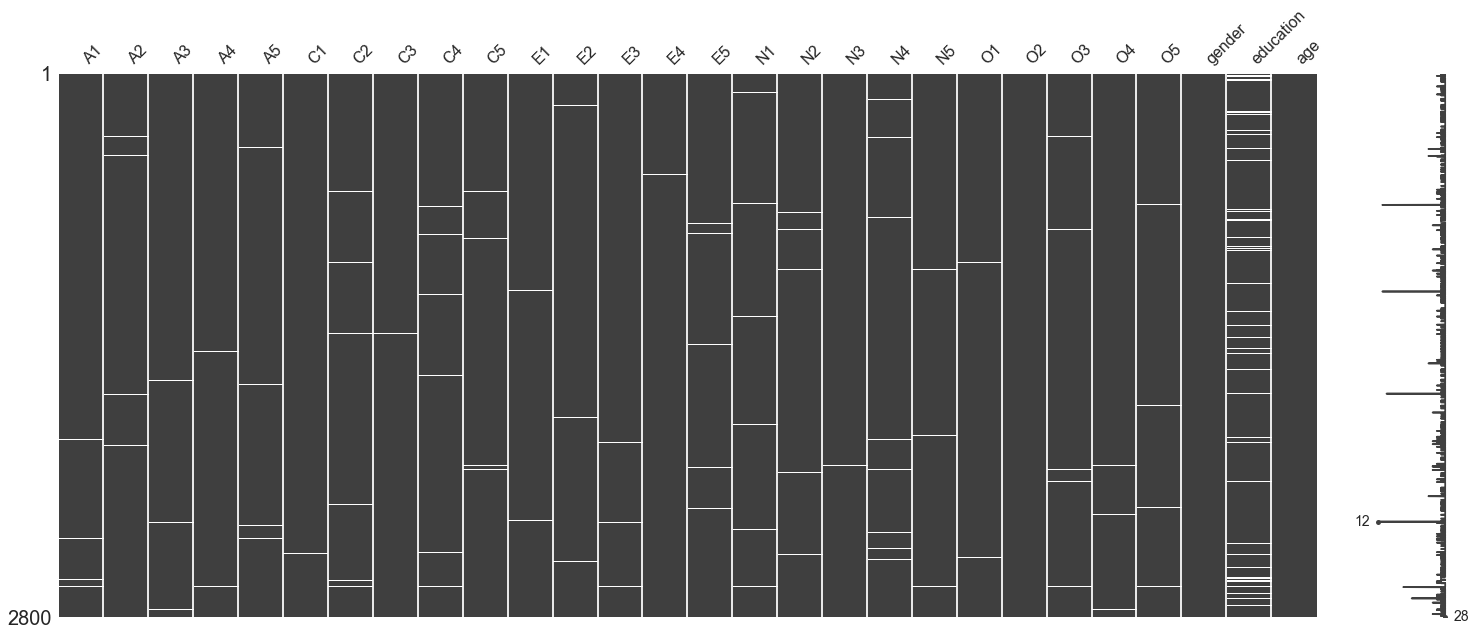

In [5]:
msngo.matrix(df)

In [6]:
for colname, serie in df.iteritems():
        print(colname, "NA's %\n" )
        print(serie.isnull().value_counts('%'))

A1 NA's %

False    0.994286
True     0.005714
Name: A1, dtype: float64
A2 NA's %

False    0.990357
True     0.009643
Name: A2, dtype: float64
A3 NA's %

False    0.990714
True     0.009286
Name: A3, dtype: float64
A4 NA's %

False    0.993214
True     0.006786
Name: A4, dtype: float64
A5 NA's %

False    0.994286
True     0.005714
Name: A5, dtype: float64
C1 NA's %

False    0.9925
True     0.0075
Name: C1, dtype: float64
C2 NA's %

False    0.991429
True     0.008571
Name: C2, dtype: float64
C3 NA's %

False    0.992857
True     0.007143
Name: C3, dtype: float64
C4 NA's %

False    0.990714
True     0.009286
Name: C4, dtype: float64
C5 NA's %

False    0.994286
True     0.005714
Name: C5, dtype: float64
E1 NA's %

False    0.991786
True     0.008214
Name: E1, dtype: float64
E2 NA's %

False    0.994286
True     0.005714
Name: E2, dtype: float64
E3 NA's %

False    0.991071
True     0.008929
Name: E3, dtype: float64
E4 NA's %

False    0.996786
True     0.003214
Name: E4, dtype: floa

In [7]:
df = df.dropna()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2236 entries, 5 to 2799
Data columns (total 28 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   A1         2236 non-null   float64
 1   A2         2236 non-null   float64
 2   A3         2236 non-null   float64
 3   A4         2236 non-null   float64
 4   A5         2236 non-null   float64
 5   C1         2236 non-null   float64
 6   C2         2236 non-null   float64
 7   C3         2236 non-null   float64
 8   C4         2236 non-null   float64
 9   C5         2236 non-null   float64
 10  E1         2236 non-null   float64
 11  E2         2236 non-null   float64
 12  E3         2236 non-null   float64
 13  E4         2236 non-null   float64
 14  E5         2236 non-null   float64
 15  N1         2236 non-null   float64
 16  N2         2236 non-null   float64
 17  N3         2236 non-null   float64
 18  N4         2236 non-null   float64
 19  N5         2236 non-null   float64
 20  O1      

<AxesSubplot:>

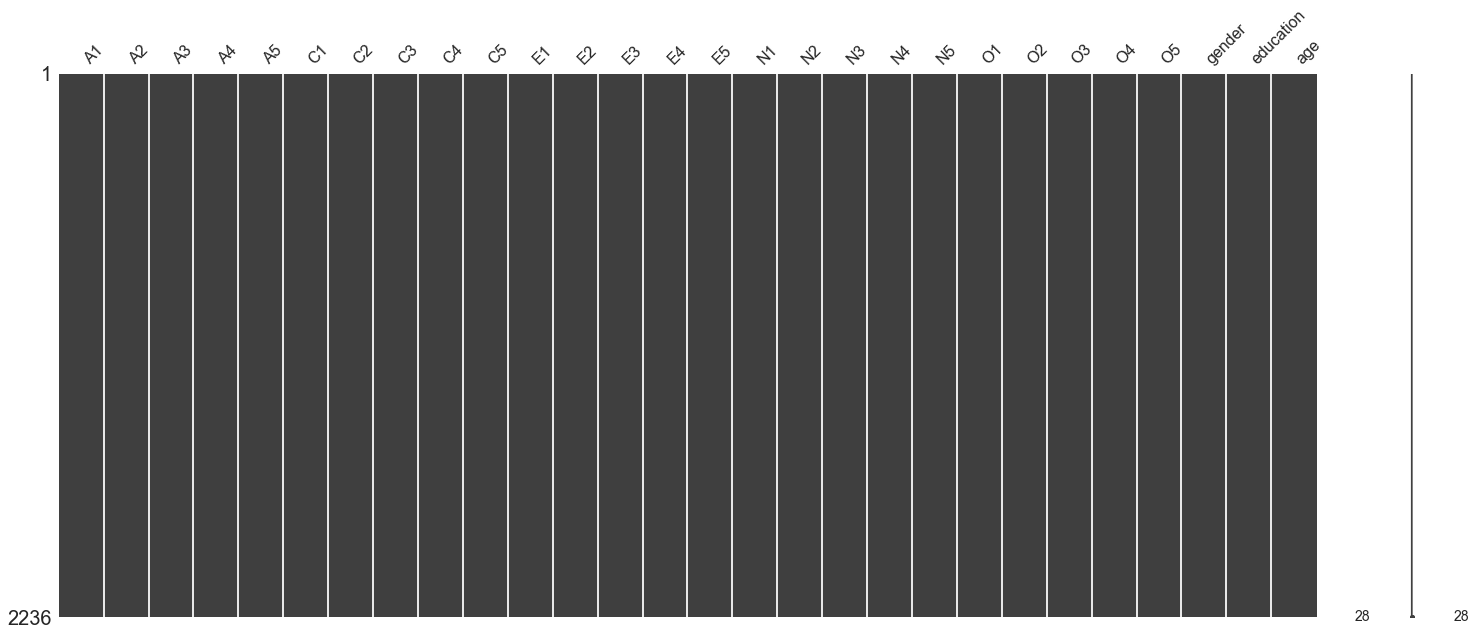

In [9]:
msngo.matrix(df)

### Desafío 3: Descripción
* Separe en un nuevo objeto DataFrame la batería de preguntas a extraer.
* Reporte las medias para cada una de las preguntas de la batería. Esto lo puede lograr con un dotplot.
* Genere una matriz de correlaciones con este nuevo objeto. Visualízalo con heatmap.
Comente sobre los principales patrones de correlación entre las preguntas de la
batería.


In [10]:
personality_df = df.loc[:, 'A1':'O5']

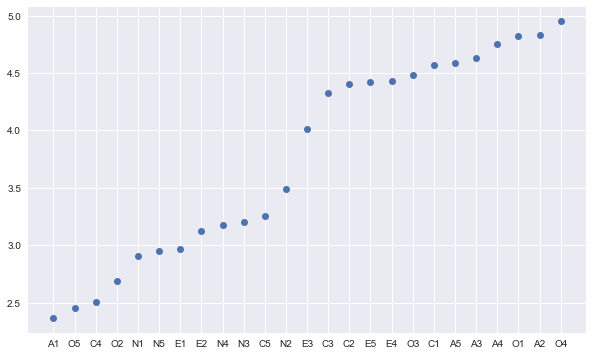

In [11]:
plt.plot(personality_df.mean().sort_values(), "o")

In [12]:
personality_corrs_abs = personality_df.corr()

<AxesSubplot:>

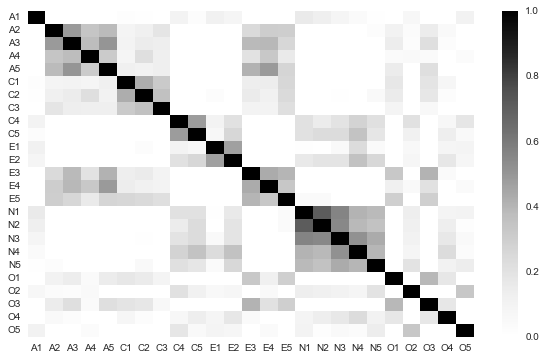

In [13]:
sns.heatmap(personality_corrs_abs, cmap='Greys', vmin=0.0, square=False)

### Desafío 4: Extracción de factores
* Antes de iniciar la extracción de factores, inspeccione la idoneidad de la batería de preguntas para realizar un análisis factorial mediante la prueba de esfericidad de 
Barlett y Kaiser-Meyer-Olkin. Comente los resultados.
* Instancie un objeto con FactorAnalyzer() donde se estimen 10 dimensiones latentes y no se aplique rotación.
* Genere un scree plot entre los eigenvalues del modelo y la cantidad de dimensiones estimables.
* Refactoriza el objeto con FactorAnalyzer() para incluir la cantidad de dimensiones válidas que informó el scree plot.
* Extraiga las cargas λ del modelo e identifique qué ítems están asociados a cada factor. Comente sobre qué significa cada factor construído.

In [14]:
factor.calculate_bartlett_sphericity(personality_df)

(16484.781654160346, 0.0)

In [15]:
factor.calculate_kmo(personality_df)

(array([0.73800513, 0.83438706, 0.87168092, 0.87052456, 0.90069876,
        0.8382246 , 0.78856879, 0.84957782, 0.82377583, 0.86199417,
        0.84163355, 0.88398702, 0.89315613, 0.87828221, 0.89412711,
        0.77828122, 0.77860688, 0.86016659, 0.88634504, 0.86060353,
        0.85512269, 0.78396215, 0.83386785, 0.78127086, 0.75821282]),
 0.8469455121781347)

In [16]:
personality_factor = factor.FactorAnalyzer(n_factors=6) 
personality_factor.fit(personality_df)

FactorAnalyzer(n_factors=6, rotation_kwargs={})

In [17]:
personality_eigenvalues = personality_factor.get_eigenvalues()[0]

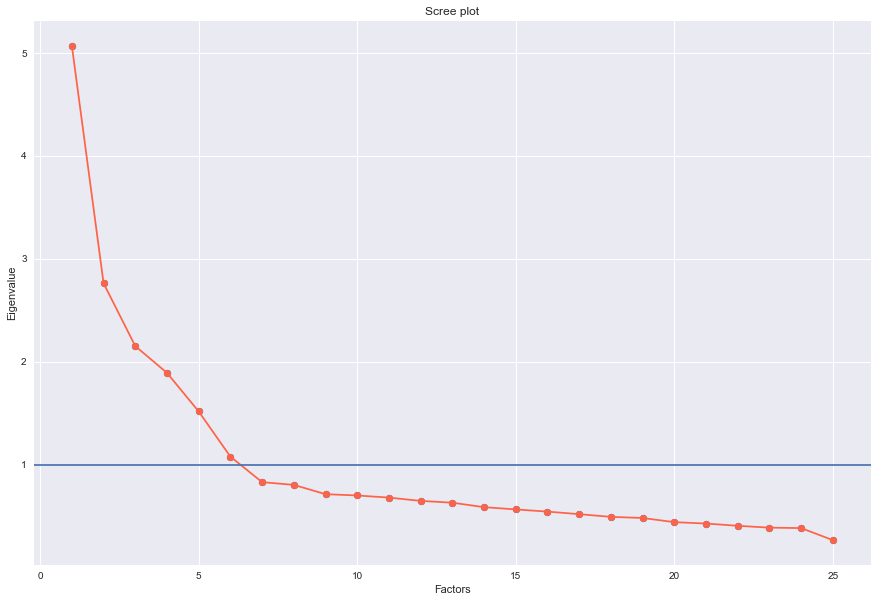

In [18]:
plt.figure(figsize=(15,10))
plt.scatter(range(1,personality_df.shape[1]+1),personality_eigenvalues)
plt.plot(range(1,personality_df.shape[1]+1), personality_eigenvalues,  'o-', color='tomato')
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.axhline(1)
plt.title("Scree plot")
plt.show()

### Desafío 5: Modelación de factores
* Extraiga los puntajes del modelo factorial a su base de datos.
* Grafique la densidad de cada uno con kdplot.
* Modele y comente brevemente sobre cuáles son los principales determinantes de cada factor en base al siguiente modelo estimable:

$$\bar Y = \beta_0 + \beta_1 \times gender + \beta_2 \times \beta_1 \times age + \varepsilon_i $$

In [19]:
personality_loadings = personality_factor.loadings_
personality_loadings

array([[ 0.04424599,  0.08732614,  0.10630779,  0.14775215, -0.62321728,
         0.17473687],
       [ 0.11368602,  0.17964962,  0.05815394, -0.02598935,  0.63954146,
        -0.03974233],
       [ 0.00489421,  0.26906571,  0.02571255,  0.02073193,  0.48993031,
         0.18680318],
       [-0.04763319,  0.12925091,  0.19033621,  0.18247103,  0.32484374,
         0.06007358],
       [-0.16494203,  0.32359081, -0.01386535,  0.02980273,  0.3140843 ,
         0.28515062],
       [ 0.03532397, -0.04162308,  0.58879093, -0.13818821, -0.07677566,
        -0.00296578],
       [ 0.08136013, -0.12182411,  0.73784003, -0.01226394, -0.039509  ,
         0.03829778],
       [ 0.01570423, -0.07702098,  0.60828069,  0.05544249,  0.04390094,
        -0.10427803],
       [ 0.02590742,  0.02055363, -0.6717314 ,  0.11655467, -0.14057209,
         0.48014872],
       [ 0.15325314, -0.08739505, -0.55509591, -0.06515018, -0.00340265,
         0.236204  ],
       [-0.15842586, -0.6868344 ,  0.19816162,  0.

In [20]:
personality_loadings  = pd.DataFrame(data=personality_loadings)

In [21]:
personality_loadings_new = personality_loadings.applymap(lambda x: np.where(x < .4, ' ', round(x,2))) 
personality_loadings_new

,0,1,2,3,4,5
0,,,,,,
1,,,,,0.64,
2,,,,,0.49,
3,,,,,,
4,,,,,,
5,,,0.59,,,
6,,,0.74,,,
7,,,0.61,,,
8,,,,,,0.48
9,,,,,,


In [22]:
fa = factor.FactorAnalyzer(n_factors=5, rotation='varimax')
fa.fit(df)
eigen_values = fa.get_eigenvalues()[0]

In [23]:
corr = fa.corr_
corr

array([[ 1.00000000e+00, -3.40196538e-01, -2.63030888e-01,
        -1.43493893e-01, -1.86058607e-01,  1.99475017e-02,
         1.35431648e-02, -9.44154396e-03,  9.99505273e-02,
         2.41364487e-02,  1.19356367e-01,  8.36750091e-02,
        -4.43058314e-02, -6.82623340e-02, -1.78827833e-02,
         1.59007327e-01,  1.31985050e-01,  8.83465087e-02,
         4.42357888e-02,  7.94603435e-03,  2.52215172e-03,
         6.63183446e-02, -6.23914513e-02, -8.95898569e-02,
         1.08564523e-01, -1.67228464e-01, -1.36587182e-01,
        -1.36628257e-01],
       [-3.40196538e-01,  1.00000000e+00,  4.84847320e-01,
         3.42174560e-01,  3.82181386e-01,  9.16726904e-02,
         1.25589472e-01,  1.85624388e-01, -1.39100420e-01,
        -1.10891968e-01, -2.36445131e-01, -2.41833321e-01,
         2.48519985e-01,  3.01574684e-01,  2.97242167e-01,
        -7.96035393e-02, -3.85061077e-02, -2.04299774e-02,
        -8.62297811e-02,  2.41409905e-02,  1.08006320e-01,
         3.24442679e-02,  1.46

In [24]:
factor_loadings = fa.loadings_
factor_loadings

array([[ 0.01659752,  0.10674005,  0.04992657, -0.49433427, -0.13958147],
       [ 0.28592252,  0.03447519,  0.12078824,  0.60657711,  0.056159  ],
       [ 0.40851533,  0.00556737,  0.09427805,  0.56132754,  0.04359943],
       [ 0.23578334, -0.06954673,  0.20969254,  0.41311052, -0.12536253],
       [ 0.45593477, -0.12707383,  0.07407618,  0.45420993,  0.04718921],
       [ 0.08723575,  0.01914181,  0.54090403,  0.01697113,  0.19977694],
       [ 0.05836371,  0.09167726,  0.62918187,  0.09237664,  0.09423007],
       [ 0.04024821, -0.03713598,  0.55182634,  0.11558336,  0.00408803],
       [-0.06124446,  0.2403866 , -0.63398422, -0.06721512, -0.09413115],
       [-0.17069496,  0.28301822, -0.56659105, -0.04643505,  0.0660259 ],
       [-0.55610738,  0.03625873,  0.02477608, -0.09990326, -0.00980407],
       [-0.66317537,  0.24706942, -0.10424634, -0.06832717,  0.00398462],
       [ 0.62497463,  0.02245877,  0.08960141,  0.14111715,  0.22161917],
       [ 0.67634689, -0.12986374,  0.0

In [25]:
personality_scores = personality_factor.transform(personality_df)

In [26]:
personality_scores  = pd.DataFrame(data = personality_scores)

In [27]:
loadings = pd.DataFrame(fa.loadings_, columns=['Factor1', 'Factor2', 'Factor3', 'Factor4', 'Factor5'], index=df.columns)

In [28]:
for colnames, serie in personality_scores.iteritems():
        df[str(colnames)] = serie

In [29]:
loadings.head()

,Factor1,Factor2,Factor3,Factor4,Factor5
A1,0.016598,0.106740,0.049927,-0.494334,-0.139581
A2,0.285923,0.034475,0.120788,0.606577,0.056159
A3,0.408515,0.005567,0.094278,0.561328,0.043599
A4,0.235783,-0.069547,0.209693,0.413111,-0.125363
A5,0.455935,-0.127074,0.074076,0.454210,0.047189


In [30]:
loadings.drop(columns = ['Factor1', 'Factor2','Factor3','Factor4','Factor5' ], inplace=True)

In [31]:
df.rename(columns = {'0':'Factor1','1':'Factor2','2':'Factor3','3':'Factor4', '4':'Factor5','5':'Factor6' }, inplace=True)

In [32]:
df

,A1,A2,A3,A4,A5,C1,C2,C3,C4,C5,...,O5,gender,education,age,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6
5,6.0,6.0,5.0,6.0,5.0,6.0,6.0,6.0,1.0,3.0,...,1.0,2,3.0,21,0.993906,0.315536,0.042770,-0.702357,0.906266,1.080599
7,4.0,3.0,1.0,5.0,1.0,3.0,2.0,4.0,2.0,4.0,...,3.0,1,2.0,19,-1.045651,1.648925,0.235251,-0.381872,0.609441,-0.380616
10,4.0,4.0,5.0,6.0,5.0,4.0,3.0,5.0,3.0,2.0,...,3.0,1,1.0,21,0.614552,0.989915,-0.324332,-0.291656,-0.131274,1.066310
14,4.0,5.0,2.0,2.0,1.0,5.0,5.0,5.0,2.0,2.0,...,5.0,1,1.0,17,-0.388209,-1.684845,0.160789,0.172256,0.570451,-0.048482
22,1.0,5.0,6.0,5.0,6.0,4.0,3.0,2.0,4.0,5.0,...,2.0,1,5.0,68,0.848704,-0.827370,-1.044507,0.391253,-1.162846,-0.213704
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2792,5.0,5.0,5.0,6.0,5.0,6.0,6.0,2.0,4.0,5.0,...,4.0,2,3.0,22,NaN,NaN,NaN,NaN,NaN,NaN
2793,3.0,4.0,3.0,1.0,3.0,5.0,4.0,5.0,3.0,4.0,...,2.0,2,4.0,24,NaN,NaN,NaN,NaN,NaN,NaN
2797,2.0,3.0,5.0,2.0,5.0,5.0,5.0,5.0,1.0,1.0,...,3.0,2,4.0,29,NaN,NaN,NaN,NaN,NaN,NaN
2798,5.0,2.0,2.0,4.0,4.0,5.0,5.0,5.0,2.0,6.0,...,1.0,1,4.0,31,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
df['gender'] = df['gender'].replace([1, 2], [1, 0])

In [34]:
for i in df.loc[:, 'Factor1':'Factor6']: 
        print(i)
        print(smf.ols(i + "~ gender + education + age", df).fit().summary().tables[1])

Factor1
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0076      0.085      0.089      0.929      -0.159       0.174
gender        -0.0135      0.048     -0.282      0.778      -0.107       0.080
education     -0.0188      0.021     -0.907      0.364      -0.060       0.022
age            0.0016      0.002      0.747      0.455      -0.003       0.006
Factor2
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0317      0.083      0.384      0.701      -0.130       0.194
gender        -0.0158      0.047     -0.339      0.735      -0.107       0.076
education     -0.0067      0.020     -0.331      0.740      -0.046       0.033
age            0.0004      0.002      0.213      0.832      -0.004       0.005
Factor3
                 coef    std

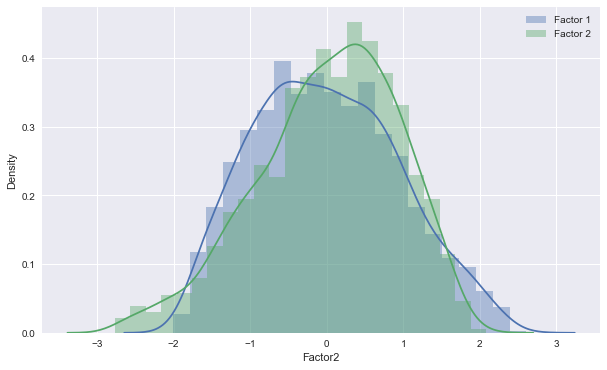

In [35]:
sns.distplot(df.loc[:, 'Factor1'], label='Factor 1') 
sns.distplot(df.loc[:, 'Factor2'], label='Factor 2') 
plt.legend()

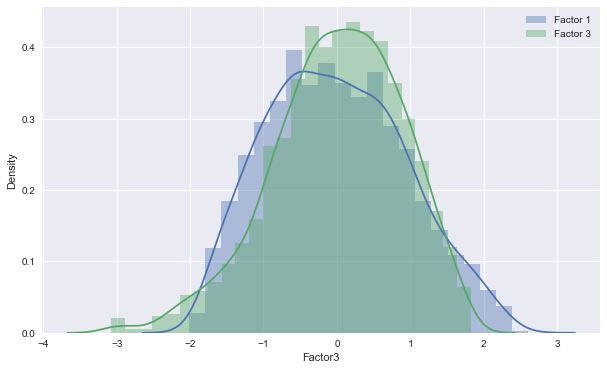

In [36]:
sns.distplot(df.loc[:, 'Factor1'], label='Factor 1') 
sns.distplot(df.loc[:, 'Factor3'], label='Factor 3') 
plt.legend()

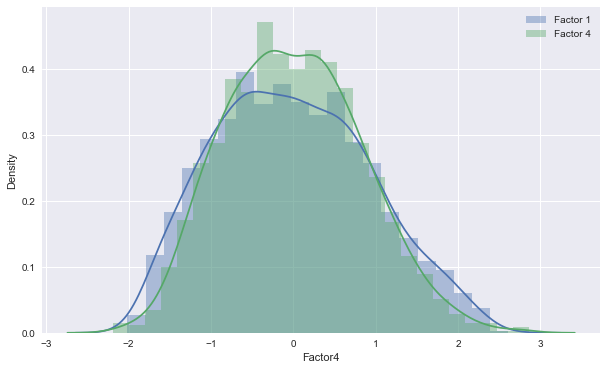

In [37]:
sns.distplot(df.loc[:, 'Factor1'], label='Factor 1') 
sns.distplot(df.loc[:, 'Factor4'], label='Factor 4') 
plt.legend()

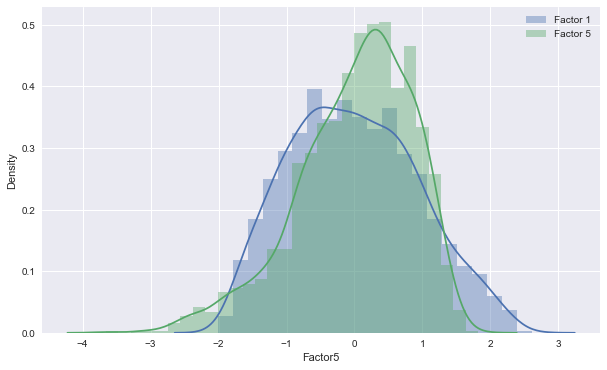

In [38]:
sns.distplot(df.loc[:, 'Factor1'], label='Factor 1') 
sns.distplot(df.loc[:, 'Factor5'], label='Factor 5') 
plt.legend()

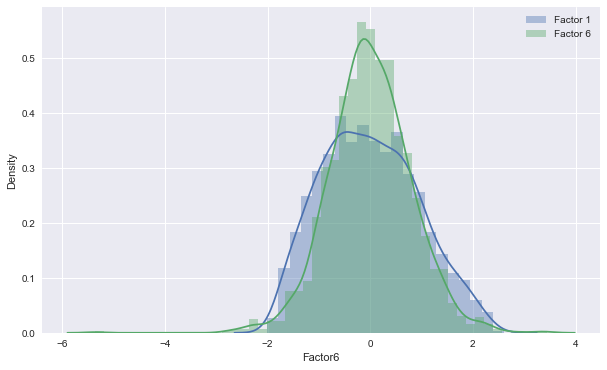

In [39]:
sns.distplot(df.loc[:, 'Factor1'], label='Factor 1') 
sns.distplot(df.loc[:, 'Factor6'], label='Factor 6') 
plt.legend()